Generative Models, Naive Bayes Classifier

Kernels

PCA and Eigenface

In [1]:
import csv
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.preprocessing as pr

In [2]:
#LOAD IN DATA
datContent = [i.strip().split() for i in open("faces.dat").readlines()]

# write it as a new CSV file
with open("faces.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(datContent)

threeDArray = np.zeros((400,64,64))
    
with open("faces.csv", "r") as f:
    read = csv.reader(f)
    i = 0;
    for row in read:
        # remove , delimters
        # reshape row of 4096 to 64X64
        if (len(row) == 4096):
            np_array = np.asarray(row)
            reshaped = np_array.reshape(64,64).T
            threeDArray[i] = reshaped
            i+=1      


(a) [5 points] Display the 100th image.


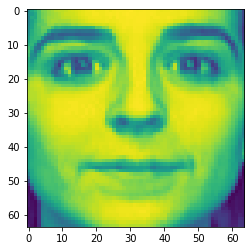

In [3]:
#Plot row 99
plt.imshow(threeDArray[99])

(b) [5 points] Remove the mean of the images, and then display the 100th image.


(400, 64, 64)


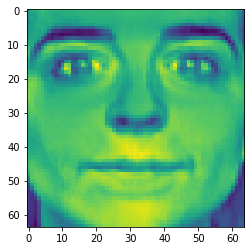

In [4]:
print(threeDArray.shape)
meanImg = np.zeros((64,64))

for t in range(64):
    #columns
    for j in range(64):
        meanSum = 0
        mean = 0
        for x in range(400):
            meanSum += threeDArray[x][t][j]
        mean = meanSum/400
        meanImg[t][j] = mean
        
plt.imshow(threeDArray[99]-meanImg)

(c) [10 points] Perform PCA on the mean-centered data matrix. You can either implement PCA by
yourself using eigenvalue decomposition over the sample covariance matrix (e.g., the eig function
in Matlab), or use a existing machine learning toolbox (e.g., pca in Matlab). Sort the eigenvalues
in a descending order and plot them.


In [5]:
for i in range (400):
    threeDArray[i] = threeDArray[i] - meanImg

400


Text(0.5, 1.0, 'Index vs Value')

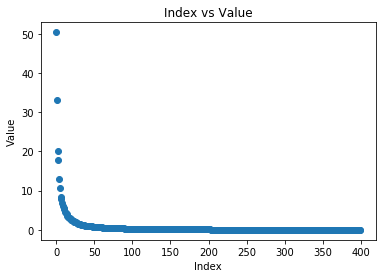

In [10]:
reshaped_rows =  np.zeros((400,4096))

for i in range(400):
    reshaped_rows[i] = threeDArray[i].flatten()

scaler = pr.StandardScaler()
scaler.fit(reshaped_rows)
scaledData = scaler.transform(reshaped_rows)

pca = PCA()
pca.fit(scaledData)


cov_mat = np.cov(scaledData, rowvar = True)
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

print(len(eigen_values))

#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

n_components = 1 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

index = np.arange(400)

plt.scatter(index, sorted_eigenvalue)
plt.ylabel('Value')
plt.xlabel('Index')
plt.title('Index vs Value')

(d) [5 points] You will find the last (i.e., 400th) eigenvalue is 0. Explain why.


The last eigenvalue is 0 because

(e) [5 points] Based on the eigenvalues, determine the dimensionality of the data you want to keep
(i.e., how many principal components you want to keep), which accounts for most of the variance.
Explain your reason.


(f) [10 points] Display the top-5 leading eigenvectors (corresponding to the top-5 largest eigenvalues)
in 5 figures.

In [12]:
for i in range (5):
    plt.imshow(sorted_eigenvectors[i]))

ValueError: cannot reshape array of size 400 into shape (64,64)

(g) [10 points] Display, respectively, the reconstructed 100th images using 10, 100, 200, and 399 principal components. (Hint: Lecture 10 (page 19), we have learned that ˆx = vv>x if we project x into
1-dimensional space using the 1st principal component. Reconstructed ˆx using top-K principal
components is a straightforward extension: ˆx = PK k=1 vkv>k x)